In [1]:
import os
import json
import numpy as np
import pandas as pd

## Load the data

In [2]:
path_to_data= "../data/annotated/annotations.jsonl"

df = pd.read_json(path_or_buf=path_to_data, lines=True)

In [3]:
df

,id,text,status,url,file_name,label,Comments
0,1,Page Not Found\nThe page you are looking for d...,1,http://www.vawayside.net/store/products/tag/beds,data/crawled_texts/idx_4_2_s_1.json,[],[]
1,2,(07) 5556 0693\n[email protected]\n130 Siganto...,1,https://hemisphereliving.com.au/products/,data/crawled_texts/idx_0_4_s_1.json,"[[187, 210, product], [237, 267, product], [29...",[]
2,3,404\nWe could not find the page you were looki...,0,https://edenliving.online/collections/summerlo...,data/crawled_texts/idx_1_4_s_0.json,[],[]
3,4,404\nPage not found\nContinue shopping,0,https://www.ourfurniturewarehouse.com.au/produ...,data/crawled_texts/idx_2_0_s_0.json,[],[]
4,5,View fullsize image\nEmail us about this produ...,1,https://www.hudsonfurniture.com.au/products/st...,data/crawled_texts/idx_3_1_s_1.json,"[[98, 123, product], [591, 618, product], [644...",[]
...,...,...,...,...,...,...,...
249,250,Your connection is not private\nAttackers migh...,1,https://rusticcraft.ca/products/rocking-chair,data/crawled_texts/idx_57_0_s_1.json,[],[]
250,251,"Error 404-NotBranded occurred\nRegardless, we ...",0,https://rusteak.com/products/sofa,data/crawled_texts/idx_57_1_s_0.json,[],[]
251,252,404 page not found\nThe page you requested doe...,0,https://mildanmarket.com/products/bling-mirror-30,data/crawled_texts/idx_59_1_s_0.json,[],[]
252,253,Home\nAbout\nFurniture\nHome & Giftwares\nOutd...,1,http://veranda.com.au/products/#outdoor-anchor,data/crawled_texts/idx_59_4_s_1.json,"[[778, 805, product], [843, 880, product], [90...",[]


In [4]:
# getting the count of labels
anno_counts = df.label.apply(len)

## annotation summary

<Axes: >

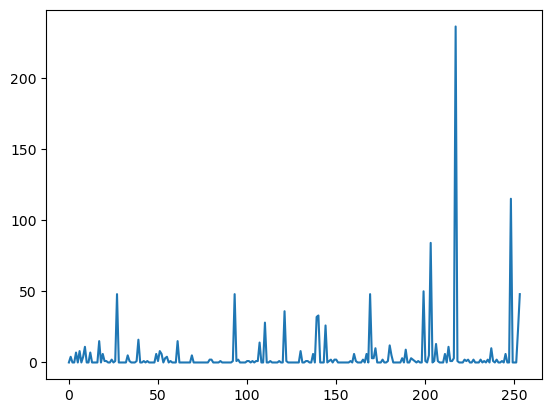

In [5]:
# number of annotations plot
anno_counts.plot()

In [6]:
anno_counts.describe()

count    254.000000
mean       4.712598
std       18.868174
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max      236.000000
Name: label, dtype: float64

## Number of samples with annotatinos

In [7]:
sum(anno_counts>0)

105

## number of samples without annotations

In [8]:
sum(anno_counts==0)

149

as you can see more than half of the samples have no annotations.

## what the label data represents 

In [9]:
row = df.iloc[1]
text = row['text']
label = row['label']

In [10]:
text

'(07) 5556 0693\n[email protected]\n130 Siganto Drive, Helensvale, QLD, 4212\nHOME\nOUR STORY\nPRODUCTS BY STYLE\nPRODUCTS BY CATEGORY\nCONTACT\nSearch for:\nHome > Products\nProducts On Sale\nSALE!\nAlexander 3 Seater Sofa\n$2,795.00 $1,595.00\nSALE!\nSimja 6 Piece Alfresco Setting\n$3,200.00 $1,995.00\nSALE!\nRecycled Pine TV Cabinet\n$2,495.00 $1,695.00\nSALE!\nYukon 2.8m Dining Table\n$1,995.00 $795.00\nOUR LOCATION\nCONTACT INFO\n130 Siganto Drive, Helensvale, QLD, 4212\n[email protected]\n(07) 5556 0693\nFOLLOW US\ninstagram\nfacebook\nCATEGORIES\nCoastal Furniture Gold Coast\nDining Chairs Gold Coast\nDining Tables Gold Coast\nIndustrial Furniture Gold Coast\nModern Furniture Gold Coast\nCoffee Tables Gold Coast\nCopyright 2023 © Hemisphere Living. Site by Enhance Industries.'

In [11]:
label

[[187, 210, 'product'],
 [237, 267, 'product'],
 [294, 318, 'product'],
 [345, 368, 'product']]

In [12]:
text[label[0][0]:label[0][1]]

'Alexander 3 Seater Sofa'

so that means <b> each label represents begining and and ending of the target label </b>

## cleaning extra whitespaces 

we only have two samples with extra white spaces

In [13]:
df[~(df.text.str.replace("\n", " ").str.strip() == df.text.str.replace("\n", " "))]

,id,text,status,url,file_name,label,Comments
18,19,Please call Sales on (844) 825-76...,1,https://modshop1.com/collections/amalfi/produc...,data/crawled_texts/idx_4_4_s_1.json,[],[]
54,55,Facebook Messenger\nREVIEW US\n(4.3)\nNEED HEL...,1,https://www.goodwoodfurniture.com.au/products/...,data/crawled_texts/idx_11_2_s_1.json,"[[411, 424, product], [457, 470, product], [48...",[]
134,135,PRODUCTS\nsearch\nSearch for:\nSearch\nAll Din...,1,http://modliving.com.ph/products/,data/crawled_texts/idx_39_1_s_1.json,"[[130, 153, product]]",[]
165,166,now is modern browser Chat with usLiveChat\nSI...,1,https://tabularasa-furniture.com/collections/f...,data/crawled_texts/idx_35_2_s_1.json,"[[128, 160, product], [695, 719, product]]",[]


In [14]:
# def transform_labels(text, labels):
#     last_index = 0
#     results = []
#     for label in labels:
#         start, end, l = label
#         before_words = text[last_index: start].split(" ")
#         before_words = [word for word in before_words if len(word) > 0]
#         num_of_words_before = len(before_words)
        
#         between_words = text[start: end].split(" ")
#         between_words = [word for word in between_words if len(word) > 0]
#         num_of_words_between = len(between_words)
#         results.extend(["O"]*num_of_words_before)
#         results.extend([product_indicator]*num_of_words_between)
#         last_index = end
#     last_words = text[last_index:].split(" ")
#     last_words = [word for word in last_words if len(word) > 0]
#     results.extend(["O"] * len(last_words))
#     return text.split(" "), results
# result = df.apply(lambda x: transform_labels(x['text'].replace("\n", " "), x['label']), axis=1)
# final_df = pd.DataFrame({'words':result.apply(lambda x: x[0]), 'labels':result.apply(lambda x: x[1])})

In [15]:
import copy
def printing_labels(text, labels):    
    for label in labels:
        print(text[label[0]:label[1]])
        
def remove_extra_spaces(x):
    text_, labels_ = x['text'], copy.deepcopy(x['label'])
    try:
        db_white_space_index = text_.index("  ")
        while(db_white_space_index >= 0):
            text_ = text_[:db_white_space_index] + text_[db_white_space_index+1:]
            starting_index = -1
            for idx, label in enumerate(labels_):
                if label[0] > db_white_space_index:
                    starting_index = idx
                    break                    
            if(starting_index >= 0):                
                for idx in range(starting_index, len(labels_)):
                    labels_[idx][0] = max(0, labels_[idx][0]-1)
                    labels_[idx][1] = max(labels_[idx][1]-1, 0)
            db_white_space_index = text_.index("  ")
    except Exception as e:
        pass
    
    if text_[-1] == " ":
        text_ = text_[:-1]
    if text_[0] == " ":
        text_ = text_[1:]
        for idx in range(0, len(labels_)):
            labels_[idx][0]= max(labels_[idx][0]-1, 0)
            labels_[idx][1] = max(labels_[idx][1]-1, 0)
    return text_, labels_

In [16]:
path_to_data= "../data/annotated/annotations.jsonl"

df = pd.read_json(path_or_buf=path_to_data, lines=True)
df.text = df.text.str.replace("\n", " ")

In [17]:
df[['text', 'label']] = df.apply(lambda x: pd.Series([remove_extra_spaces(x)[0], remove_extra_spaces(x)[1]]), axis=1)

In [18]:
db_space_df = df[~(df.text.str.replace("\n", " ").str.strip() == df.text.str.replace("\n", " "))]
db_space_df

,id,text,status,url,file_name,label,Comments


In [19]:
df.to_csv("../data/annotated/cleaned_data.csv", index=False)

In [20]:
np.max((df.text.str.split().apply(len)))

8908

In [21]:
# sum(df.text.apply(lambda x: "##" in x))